In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from collections import defaultdict
from scipy.stats import fisher_exact
import numpy as np

In [66]:
#nuc_df = pd.melt(nuc_start)
#nuc_df['date'] = '12.2019-03.2020'

In [67]:
nuc_change = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data_obtained/19.Nuc_change.csv', index_col=0)
ref_nuc = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data_obtained/19.RefNuc.csv', index_col=0)

In [68]:
nuc_change.loc[nuc_change['Sequencing_Time'] == '12.2019-03.2020', 'date'] = '12/19-03/20'
nuc_change.loc[nuc_change['Sequencing_Time'] == '10.2020', 'date'] = '10/20'
nuc_change.loc[nuc_change['Sequencing_Time'] == '09.2021-10.2021', 'date'] = '09/21-10/21'

In [69]:
manna_whitney_test = {}
aster = []
nuc = []
f_time = []
s_time = []
print(nuc_change['Sequencing_Time'].unique())
for time in nuc_change['Sequencing_Time'].unique():
    for time_next in nuc_change['Sequencing_Time'].unique():
        for i in ['U', 'C', 'G', 'A']:
            x = list(nuc_change.loc[(nuc_change['variable']==i) & (nuc_change['Sequencing_Time']==time),'value'])
            y = list(nuc_change.loc[(nuc_change['variable']==i) & (nuc_change['Sequencing_Time']==time_next),'value'])
            manna_whitney_test[i+'_'+time+'_'+time_next] = mannwhitneyu(x, y)[1]
            nuc.append(i)
            f_time.append(time)
            s_time.append(time_next)
            if manna_whitney_test[i+'_'+time+'_'+time_next] < 0.001:
                aster.append("***")
            elif manna_whitney_test[i+'_'+time+'_'+time_next] < 0.01:
                aster.append("**")
            elif manna_whitney_test[i+'_'+time+'_'+time_next] < 0.05:
                aster.append("*")
            else:
                aster.append("")

['12.2019-03.2020' '10.2020' '09.2021-10.2021']


In [70]:
man_text_df = pd.DataFrame.from_dict(manna_whitney_test, orient='index').reset_index()
man_text_df.columns = ['context_test', 'p_value']
man_text_df['aster'] = aster
man_text_df['nuc'] = nuc
man_text_df['first_date'] = f_time
man_text_df['second_date'] = s_time

In [71]:
man_text_df = man_text_df[man_text_df['p_value']<=0.05]

In [72]:
man_text_df = man_text_df[man_text_df['aster'] == '***']

In [73]:
man_text_df.to_csv('manna_wit_test_all_nuc.csv')

In [74]:
combined = ref_nuc.append(nuc_change[['date', 'variable', 'value']]).reset_index(drop=True)

In [75]:
combined.head()

,date,variable,value
0,Reference,A,8794
1,Reference,U,9461
2,Reference,G,5762
3,Reference,C,5393
4,12/19-03/20,A,8793


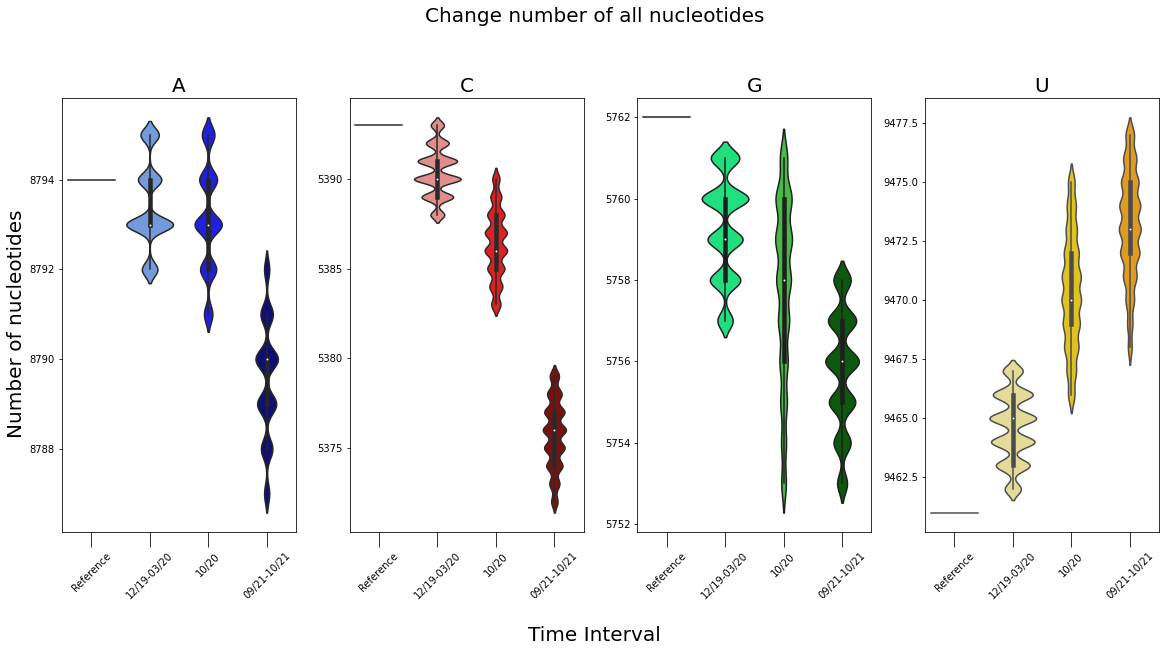

In [77]:
fig, ax = plt.subplots(1,4, figsize=(16, 8))

fig.suptitle('Change number of all nucleotides', y=1.05, size=20)

ax[0].set_title('A', size=20)
sns.violinplot(data=combined[combined['variable']=='A'], x='date', y='value', ax=ax[0], palette=['b','cornflowerblue','blue','navy'])
ax[0].tick_params(axis='x', rotation=45, size=15)


ax[1].set_title('C', size=20)
sns.violinplot(data=combined[combined['variable']=='C'], x='date', y='value', ax=ax[1], palette=['b','lightcoral','r','darkred'])
ax[1].tick_params(axis='x', rotation=45, size=15)

ax[2].set_title('G', size=20)
sns.violinplot(data=combined[combined['variable']=='G'], x='date', y='value', ax=ax[2], palette=['b','springgreen','limegreen','darkgreen'])
ax[2].tick_params(axis='x', rotation=45, size=15)

ax[3].set_title('U', size=20)
sns.violinplot(data=combined[combined['variable']=='U'], x='date', y='value', ax=ax[3], palette=['b','khaki','gold','orange'])
ax[3].tick_params(axis='x', rotation=45, size=15)

#fig.set(xlabel='Number of nucleotides', ylabel='Time change')
for ax in ax.flat:
    ax.set(xlabel='', ylabel='')
fig.text(0.5, -0.05, 'Time Interval', ha='center', size=20)
fig.text(-0.01, 0.5, 'Number of nucleotides', va='center', rotation='vertical', size=20)
fig.tight_layout()

        

fig.savefig("All_Nuc_Change.pdf", bbox_inches = 'tight')

In [13]:
nuc_change = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data_obtained/19.FF_Nuc_change_CG.csv', index_col=0)
ref_nuc = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data_obtained/19.RefFFNuc_CG.csv', index_col=0)

In [70]:
combined = ref_nuc.append(nuc_change[['date', 'variable', 'value']]).reset_index(drop=True)

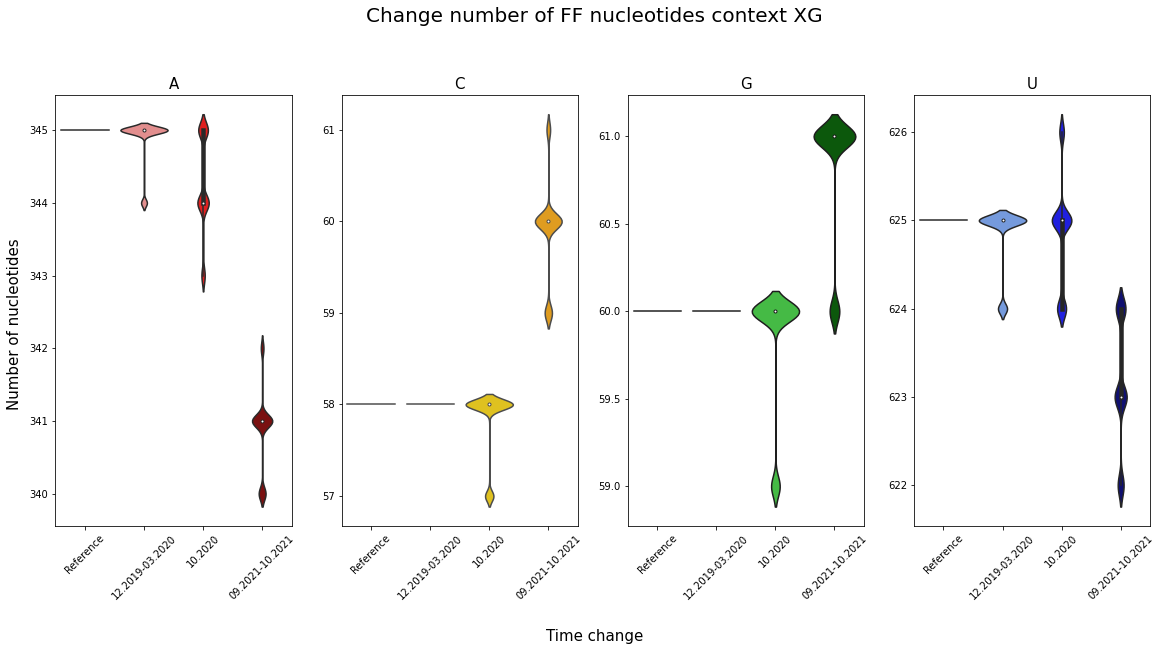

In [71]:
fig, ax = plt.subplots(1,4, figsize=(16, 8))

fig.suptitle('Change number of FF nucleotides context XG', y=1.05, size=20)

ax[0].set_title('A', size=15)
sns.violinplot(data=combined[combined['variable']=='A'], x='date', y='value', ax=ax[0], palette=['b','lightcoral','r','darkred'])
ax[0].tick_params(axis='x', rotation=45)


ax[1].set_title('C', size=15)
sns.violinplot(data=combined[combined['variable']=='C'], x='date', y='value', ax=ax[1], palette=['b','khaki','gold','orange'])
ax[1].tick_params(axis='x', rotation=45)

ax[2].set_title('G', size=15)
sns.violinplot(data=combined[combined['variable']=='G'], x='date', y='value', ax=ax[2], palette=['b','springgreen','limegreen','darkgreen'])
ax[2].tick_params(axis='x', rotation=45)

ax[3].set_title('U', size=15)
sns.violinplot(data=combined[combined['variable']=='U'], x='date', y='value', ax=ax[3], palette=['b','cornflowerblue','blue','navy'])
ax[3].tick_params(axis='x', rotation=45)

#fig.set(xlabel='Number of nucleotides', ylabel='Time change')
for ax in ax.flat:
    ax.set(xlabel='', ylabel='')
fig.text(0.5, -0.05, 'Time change', ha='center', size=15)
fig.text(-0.01, 0.5, 'Number of nucleotides', va='center', rotation='vertical', size=15)
fig.tight_layout()

fig.savefig("XG_FF_Nuc_Change.pdf")

In [4]:
df = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data/U_ideal_table.csv', index_col=0)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df = df[['Pos', 'RefNuc', 'NucInCodon', 'RefAa']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89709 entries, 1 to 89709
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pos         89709 non-null  int64 
 1   RefNuc      89709 non-null  object
 2   NucInCodon  89709 non-null  object
 3   RefAa       87780 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [7]:
df = df.drop_duplicates().reset_index(drop=True)
ff_aa = ['S', 'P', 'S_UC', 'A', 'T', 'L_CU', 'V', 'R_CG']

In [8]:
all_nuc = defaultdict(int)
ff_nuc = defaultdict(int)
all_nuc_xg = defaultdict(int)
ff_nuc_xg = defaultdict(int)
for index, row in df.iterrows():
    all_nuc[df['RefNuc'][index]]+=1
    if index+1 != len(df):
        if df['RefNuc'][index+1] == 'G':
            all_nuc_xg[df['RefNuc'][index]]+=1
        if (df['NucInCodon'][index] == '3') and (df['RefAa'][index] in (ff_aa)):
            ff_nuc[df['RefNuc'][index]]+=1
            if df['RefNuc'][index+1] == 'G':
                ff_nuc_xg[df['RefNuc'][index]]+=1

In [9]:
ref_nuc_content = pd.DataFrame([all_nuc, all_nuc_xg, ff_nuc, ff_nuc_xg])

In [10]:
ref_nuc_content.index = ['all', 'all_XG', 'ff', 'ff_XG']

In [11]:
ref_nuc_content = ref_nuc_content.transpose()

In [48]:
ref_nuc_content['all_prop'] = round(ref_nuc_content['all'] / sum(ref_nuc_content['all']), 3)
ref_nuc_content['all_XG_prop'] = round(ref_nuc_content['all_XG'] / sum(ref_nuc_content['all_XG']), 3)
ref_nuc_content['ff_prop'] = round(ref_nuc_content['ff'] / sum(ref_nuc_content['ff']), 3)
ref_nuc_content['ff_XG_prop'] = round(ref_nuc_content['ff_XG'] / sum(ref_nuc_content['ff_XG']), 3)

In [54]:
ref_nuc_content['all_info'] = ref_nuc_content['all'].astype('str') + '\n' + '(' + (round(ref_nuc_content['all_prop']*100, 3)).astype('str') + '%)'
ref_nuc_content['all_XG_info'] = ref_nuc_content['all_XG'].astype('str') + '\n' + '(' + (round(ref_nuc_content['all_XG_prop']*100, 3)).astype('str') + '%)'
ref_nuc_content['ff_info'] = ref_nuc_content['ff'].astype('str') + '\n' + '(' + (round(ref_nuc_content['ff_prop']*100, 3)).astype('str') + '%)'
ref_nuc_content['ff_XG_info'] = ref_nuc_content['ff_XG'].astype('str') + '\n' + '(' + (round(ref_nuc_content['ff_XG_prop']*100, 3)).astype('str') + '%)'

In [55]:
ref_nuc_content

,all,all_XG,ff,ff_XG,all_prop,all_XG_prop,ff_prop,ff_XG_prop,all_info,all_XG_info,ff_info,ff_XG_info
A,8954,1742,1111,345,0.299,0.297,0.302,0.317,8954\n(29.9%),1742\n(29.7%),1111\n(30.2%),345\n(31.7%)
U,9594,2589,1823,625,0.321,0.442,0.496,0.574,9594\n(32.1%),2589\n(44.2%),1823\n(49.6%),625\n(57.4%)
G,5863,1093,260,60,0.196,0.186,0.071,0.055,5863\n(19.6%),1093\n(18.6%),260\n(7.1%),60\n(5.5%)
C,5492,439,479,58,0.184,0.075,0.130,0.053,5492\n(18.4%),439\n(7.5%),479\n(13.0%),58\n(5.3%)


In [56]:
all_u = ref_nuc_content['all']['U']
all_not_u = sum(ref_nuc_content['all']) - all_u
xg_u = ref_nuc_content['all_XG']['U']
xg_not_u = sum(ref_nuc_content['all_XG']) - xg_u
table = np.array([[all_u, xg_u], [all_not_u, xg_not_u]])
oddsr, p = fisher_exact(table)
print(oddsr)
print(f'{p:.10f}')

0.5973897946483493
0.0000000000


In [57]:
ref_nuc_content

,all,all_XG,ff,ff_XG,all_prop,all_XG_prop,ff_prop,ff_XG_prop,all_info,all_XG_info,ff_info,ff_XG_info
A,8954,1742,1111,345,0.299,0.297,0.302,0.317,8954\n(29.9%),1742\n(29.7%),1111\n(30.2%),345\n(31.7%)
U,9594,2589,1823,625,0.321,0.442,0.496,0.574,9594\n(32.1%),2589\n(44.2%),1823\n(49.6%),625\n(57.4%)
G,5863,1093,260,60,0.196,0.186,0.071,0.055,5863\n(19.6%),1093\n(18.6%),260\n(7.1%),60\n(5.5%)
C,5492,439,479,58,0.184,0.075,0.130,0.053,5492\n(18.4%),439\n(7.5%),479\n(13.0%),58\n(5.3%)


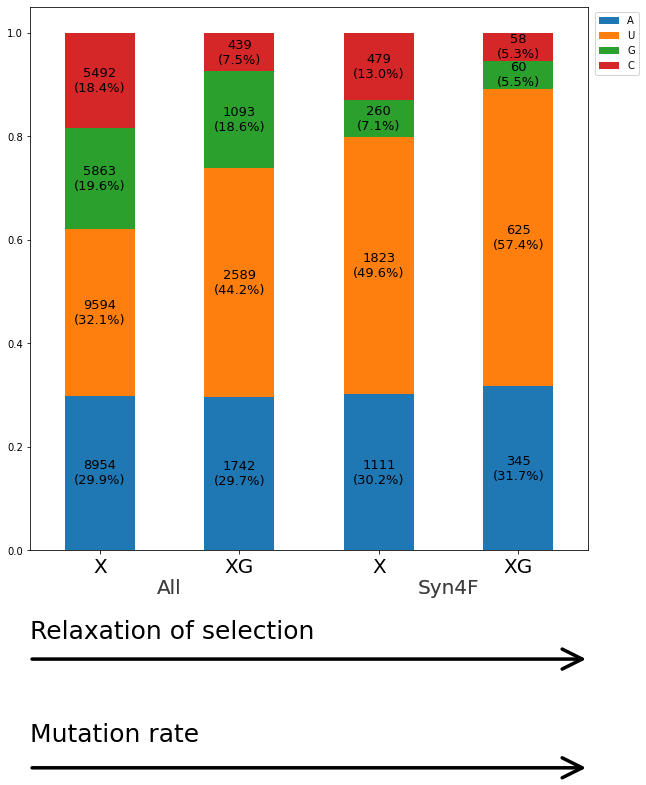

In [64]:
fig, ax = plt.subplots(1,figsize=(8,6))
ref_nuc_content[['all_prop', 'all_XG_prop', 'ff_prop', 'ff_XG_prop']].transpose().plot.bar(figsize=(10,10),stacked=True, ax=ax)

plt.text(x=0, y=ref_nuc_content['all_prop']['A']/2, s=ref_nuc_content['all_info']['A'], ha="center", va="center", fontsize=13)
plt.text(x=1 ,y=ref_nuc_content['all_XG_prop']['A']/2, s=ref_nuc_content['all_XG_info']['A'] , ha="center", va="center", fontsize=13)
plt.text(x=2 ,y=ref_nuc_content['ff_prop']['A']/2, s=ref_nuc_content['ff_info']['A'] , ha="center", va="center", fontsize=13)
plt.text(x=3 ,y=ref_nuc_content['ff_XG_prop']['A']/2, s=ref_nuc_content['ff_XG_info']['A'] , ha="center", va="center", fontsize=13)

plt.text(x=0, y=(ref_nuc_content['all_prop']['U']/2+ref_nuc_content['all_prop']['A']), s=ref_nuc_content['all_info']['U'], ha="center", va="center", fontsize=13)
plt.text(x=1 ,y=(ref_nuc_content['all_XG_prop']['U']/2+ref_nuc_content['all_XG_prop']['A']), s=ref_nuc_content['all_XG_info']['U'] , ha="center", va="center", fontsize=13)
plt.text(x=2 ,y=(ref_nuc_content['ff_prop']['U']/2+ref_nuc_content['ff_prop']['A']), s=ref_nuc_content['ff_info']['U'] , ha="center", va="center", fontsize=13)
plt.text(x=3 ,y=(ref_nuc_content['ff_XG_prop']['U']/2+ref_nuc_content['ff_XG_prop']['A']), s=ref_nuc_content['ff_XG_info']['U'] , ha="center", va="center", fontsize=13)

plt.text(x=0, 
         y=(ref_nuc_content['all_prop']['G']/2+ref_nuc_content['all_prop']['A']+ref_nuc_content['all_prop']['U']), 
         s=ref_nuc_content['all_info']['G'], ha="center", va="center", fontsize=13)
plt.text(x=1 ,
         y=(ref_nuc_content['all_XG_prop']['G']/2+ref_nuc_content['all_XG_prop']['A']+ref_nuc_content['all_XG_prop']['U']), 
         s=ref_nuc_content['all_XG_info']['G'] , ha="center", va="center", fontsize=13)
plt.text(x=2 ,
         y=(ref_nuc_content['ff_prop']['G']/2+ref_nuc_content['ff_prop']['A']+ref_nuc_content['ff_prop']['U']), 
         s=ref_nuc_content['ff_info']['G'] , ha="center", va="center", fontsize=13)
plt.text(x=3 ,
         y=(ref_nuc_content['ff_XG_prop']['G']/2+ref_nuc_content['ff_XG_prop']['A']+ref_nuc_content['ff_XG_prop']['U']), 
         s=ref_nuc_content['ff_XG_info']['G'] , ha="center", va="center", fontsize=13)

plt.text(x=0, 
         y=(ref_nuc_content['all_prop']['C']/2+ref_nuc_content['all_prop']['A']+ref_nuc_content['all_prop']['U']+ref_nuc_content['all_prop']['G']), 
         s=ref_nuc_content['all_info']['C'], ha="center", va="center", fontsize=13)
plt.text(x=1 ,
         y=(ref_nuc_content['all_XG_prop']['C']/2+ref_nuc_content['all_XG_prop']['A']+ref_nuc_content['all_XG_prop']['U']+ref_nuc_content['all_XG_prop']['G']), 
         s=ref_nuc_content['all_XG_info']['C'] , ha="center", va="center", fontsize=13)
plt.text(x=2 ,
         y=(ref_nuc_content['ff_prop']['C']/2+ref_nuc_content['ff_prop']['A']+ref_nuc_content['ff_prop']['U']+ref_nuc_content['ff_prop']['G']), 
         s=ref_nuc_content['ff_info']['C'] , ha="center", va="center", fontsize=13)
plt.text(x=3 ,
         y=(ref_nuc_content['ff_XG_prop']['C']/2+ref_nuc_content['ff_XG_prop']['A']+ref_nuc_content['ff_XG_prop']['U']+ref_nuc_content['ff_XG_prop']['G']), 
         s=ref_nuc_content['ff_XG_info']['C'] , ha="center", va="center", fontsize=13)
plt.legend(bbox_to_anchor = (1.1, 1.0))

ax.set_xticklabels(['X', 'XG', 'X', 'XG'], rotation=0, size=20)
for container in ax.containers:
    for i,child in enumerate(container.get_children()):
        if i == 0:
            ax.text(child.xy[0]+child.get_width(), -0.08, 'All', ha='center', transform=ax.transAxes, alpha=0.3, size=20)
        elif i == 2:
            ax.text(child.xy[0]-(child.get_width()*2), -0.08, 'Syn4F', ha='center', transform=ax.transAxes, alpha=0.3, size=20)
            
ax.annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), 
            arrowprops=dict(arrowstyle = '<-', color='black', lw=3.5), fontsize=50)
ax.annotate('', xy=(0, -0.4), xycoords='axes fraction', xytext=(1, -0.4), 
            arrowprops=dict(arrowstyle = '<-', color='black', lw=3.5), fontsize=50)

ax.text(-0.5, -0.17, 'Relaxation of selection', ha='left', size=25)
ax.text(-0.5, -0.37, 'Mutation rate', ha='left', size=25)

plt.savefig("Nuc_Usage_dif_pos.pdf", bbox_inches = 'tight')
